In [37]:
""" RBF 커널 PCA 구현하기 """
from scipy.spatial.distance import pdist, squareform
#from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components) :
    """
    RBF 커널 PCA 구현
    
    매개변수
    --------
    X: {넘파이 ndarray}, shape = [n_samples, n_features]
    
    gamma : float
     - RBF 커널 튜닝 매개변수
    
    n_components : int
     - 반환할 주성분 개수
    
    리턴값
    ------
    X_pc : {넘파이 ndarray}, shape = [n_samples, k_features]
     - 투영된 데이터셋
    """
    #MxN 차원의 데이터셋에서 샘플 간의 유클리디안 거리의 제곱을 계산
    sq_dists = pdist(X, 'sqeuclidean')
    
    # 샘플 간의 거리를 정방 대칭 행렬로 변환
    mat_sq_dists = squareform(sq_dists)
    
    # 커널 행렬 계산
    #K = exp(-gamma * mat_sq_dists)
    K = np.exp(-gamma * mat_sq_dists)
    
    # 커널 행렬 중앙 정렬
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    # 중앙에 맞춰진 커널 행렬의 고윳값과 고유 벡터 구하기
    eigvals, eigvecs = eigh(K)
    # eigh 함수는 오름차순으로 반환
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]
    
    # 최상위 k개의 고유 벡터를 선택 (투영 결과)
    X_pc = np.column_stack([eigvecs[:, i] for i in range(n_components)])
    
    return X_pc

# 사전에 감마 매개변수를 지정해야하며, 적절한 값을 찾기 위해 실험이 필요하다.

print('scipy의 exp는 사라질 것이라고 하여, numpy의 exp로 대체하였다.')

scipy의 exp는 사라질 것이라고 하여, numpy의 exp로 대체하였다.


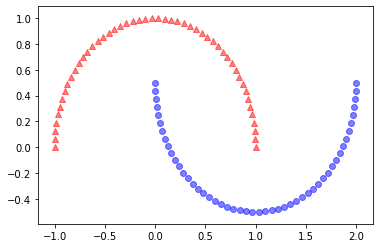

In [38]:
""" 반달 모양 데이터 가져오기 """
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples = 100, random_state = 123)
plt.scatter(X[y == 0, 0], X[y == 0, 1],
           color = 'red', marker = '^', alpha = 0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1],
           color = 'blue', marker = 'o', alpha = 0.5)
plt.show()

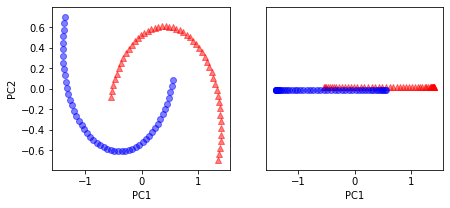

첫번째 그림은 선형적으로 구분되기 어려워보인다.
반달모양에 작은 변화와, 수직 축을 기준으로 반전되었다
두번째 그림처럼 1차원 특성 축에 투영해도 선형적으로 구분되지 않는다.


In [39]:
""" PCA로 반달 모양 구분하기 """
from sklearn.decomposition import PCA

scikit_pca = PCA(n_components = 2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (7, 3))
ax[0].scatter(X_spca[y == 0, 0], X_spca[y == 0, 1], 
             color = 'red', marker = '^', alpha = 0.5)
ax[0].scatter(X_spca[y == 1, 0], X_spca[y == 1, 1], 
             color = 'blue', marker = 'o', alpha = 0.5)
ax[1].scatter(X_spca[y == 0, 0], np.zeros((50, 1)) + 0.02,
             color = 'red', marker = '^', alpha = 0.5)
ax[1].scatter(X_spca[y == 1, 0], np.zeros((50, 1)) - 0.02,
             color = 'blue', marker = 'o', alpha = 0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

print('첫번째 그림은 선형적으로 구분되기 어려워보인다.')
print('반달모양에 작은 변화와, 수직 축을 기준으로 반전되었다')
print('두번째 그림처럼 1차원 특성 축에 투영해도 선형적으로 구분되지 않는다.')
# PCA는 비지도 학습임.

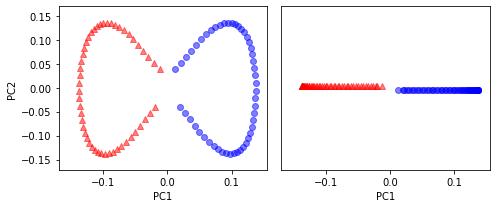

In [40]:
""" RBF 커널 PCA로 반달모양 구분하기 """

X_kpca = rbf_kernel_pca(X, gamma = 15, n_components = 2)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (7, 3))
ax[0].scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1], 
             color = 'red', marker = '^', alpha = 0.5)
ax[0].scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1], 
             color = 'blue', marker = 'o', alpha = 0.5)
ax[1].scatter(X_kpca[y == 0, 0], np.zeros((50, 1)) + 0.02,
             color = 'red', marker = '^', alpha = 0.5)
ax[1].scatter(X_kpca[y == 1, 0], np.zeros((50, 1)) - 0.02,
             color = 'blue', marker = 'o', alpha = 0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()

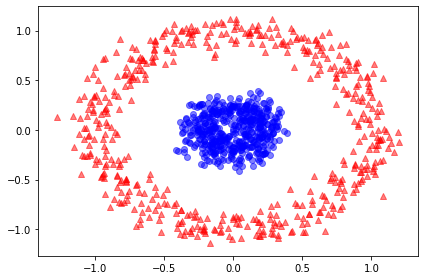

In [41]:
""" 동심원 데이터 가져오기 """
from sklearn.datasets import make_circles

X, y = make_circles(n_samples = 1000, random_state = 123, noise = 0.1, factor = 0.2)

plt.scatter(X[y == 0, 0], X[y == 0, 1],
           color = 'red', marker = '^', alpha = 0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1],
           color = 'blue', marker = 'o', alpha = 0.5)
plt.tight_layout()
plt.show()

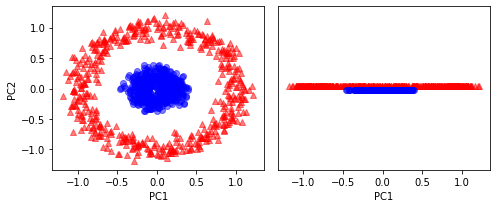

구분되지 않는다.


In [42]:
""" PCA로 동심원 구분하기 """

scikit_pca = PCA(n_components = 2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (7, 3))
ax[0].scatter(X_spca[y == 0, 0], X_spca[y == 0, 1], 
             color = 'red', marker = '^', alpha = 0.5)
ax[0].scatter(X_spca[y == 1, 0], X_spca[y == 1, 1], 
             color = 'blue', marker = 'o', alpha = 0.5)
ax[1].scatter(X_spca[y == 0, 0], np.zeros((500, 1)) + 0.02,
             color = 'red', marker = '^', alpha = 0.5)
ax[1].scatter(X_spca[y == 1, 0], np.zeros((500, 1)) - 0.02,
             color = 'blue', marker = 'o', alpha = 0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()

print('구분되지 않는다.')

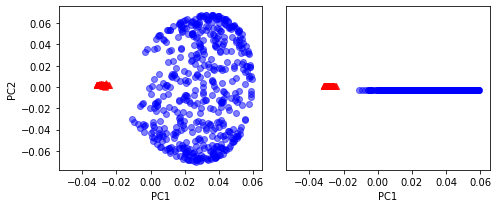

In [43]:
""" 커널 PCA로 동심원 구분하기 """

X_kpca = rbf_kernel_pca(X, gamma = 15, n_components = 2)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (7, 3))
ax[0].scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1], 
             color = 'red', marker = '^', alpha = 0.5)
ax[0].scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1], 
             color = 'blue', marker = 'o', alpha = 0.5)
ax[1].scatter(X_kpca[y == 0, 0], np.zeros((500, 1)) + 0.02,
             color = 'red', marker = '^', alpha = 0.5)
ax[1].scatter(X_kpca[y == 1, 0], np.zeros((500, 1)) - 0.02,
             color = 'blue', marker = 'o', alpha = 0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()

In [44]:
""" 새로운 데이터 포인트 투영을 위해 rbf_kernel_pca 함수 수정하기 """

def rbf_kernel_pca2(X, gamma, n_components) :
    """
    RBF 커널 PCA 구현
    
    매개변수
    --------
    X: {넘파이 ndarray}, shape = [n_samples, n_features]
    
    gamma : float
     - RBF 커널 튜닝 매개변수
    
    n_components : int
     - 반환할 주성분 개수
    
    리턴값
    ------
    alphas : {넘파이 ndarray}, shape = [n_samples, k_features]
     - 투영된 데이터셋
    
    lambdas : list
     - 고윳값
    """
    
    #MxN 차원의 데이터셋에서 샘플 간의 유클리디안 거리의 제곱을 계산
    sq_dists = pdist(X, 'sqeuclidean')
    
    # 샘플 간의 거리를 정방 대칭 행렬로 변환
    mat_sq_dists = squareform(sq_dists)
    
    # 커널 행렬 계산
    K = np.exp(-gamma * mat_sq_dists)
    
    # 커널 행렬 중앙 정렬
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    # 중앙에 맞춰진 커널 행렬의 고윳값과 고유 벡터 구하기
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]
    
    # 최상위 k개의 고유 벡터를 선택 (투영 결과)
    alphas = np.column_stack([eigvecs[:, i] for i in range(n_components)])
    
    # 고유 벡터에 상응하는 고윳값 선택
    lambdas = [eigvals[i] for i in range(n_components)]
    
    return alphas, lambdas

새 데이터 :  [1.8713187  0.00928245]
원본 투영 데이터 :  [0.07877284]
새로 투영한 데이터 :  [0.07877284]


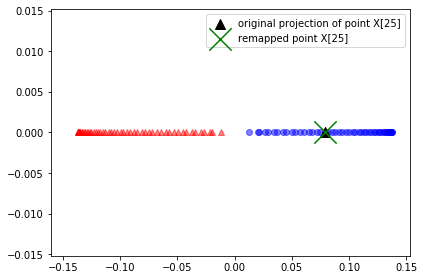

In [45]:
""" 수정된 커널 PCA로 새 데이터 투영해보기 """

# 새 반달 데이터 생성
X, y = make_moons(n_samples = 100, random_state = 123)
# 1차원 부분 공간에 투영
alphas, lambdas = rbf_kernel_pca2(X, gamma = 15, n_components = 1)

# 26번째 데이터를 새로운 데이터 x'로 가정
x_new = X[25]
print('새 데이터 : ', x_new)

#원본 투영
x_proj = alphas[25]
print('원본 투영 데이터 : ', x_proj)

# 새로운 데이터 투영 함수 구현
def project_x(x_new, X, gamma, alphas, lambdas) : 
    pair_dist = np.array([np.sum((x_new-row) ** 2) for row in X])
    k = np.exp(-gamma * pair_dist)
    
    return k.dot(alphas / lambdas)

# project_x로 새로운 데이터 투영하기
x_reproj = project_x(x_new, X, gamma = 15, alphas = alphas, lambdas = lambdas)
print('새로 투영한 데이터 : ', x_reproj)

# 투영한 것 그리기
plt.scatter(alphas[y == 0, 0], np.zeros((50)), 
           color = 'red', marker = '^', alpha = 0.5)
plt.scatter(alphas[y == 1, 0], np.zeros((50)),
           color = 'blue', marker = 'o', alpha = 0.5)
plt.scatter(x_proj, 0,
           color = 'black', label = 'original projection of point X[25]',
           marker = '^', s = 100)
plt.scatter(x_reproj, 0,
           color = 'green', label = 'remapped point X[25]',
           marker = 'x', s = 500)
plt.legend(scatterpoints = 1)
plt.tight_layout()
plt.show()

# plt.scatter의 s는 강조표시

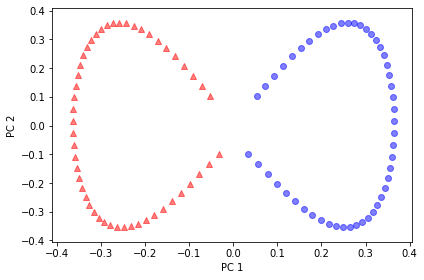

In [46]:
""" 사이킷 런 커널 PCA """
from sklearn.decomposition import KernelPCA

X, y = make_moons(n_samples = 100, random_state = 123)
scikit_kpca = KernelPCA(n_components = 2, kernel = 'rbf', gamma = 15)
X_skernpca = scikit_kpca.fit_transform(X)

# 그려보기
plt.scatter(X_skernpca[y == 0, 0], X_skernpca[y == 0, 1],
           color = 'red', marker = '^', alpha = 0.5)
plt.scatter(X_skernpca[y == 1, 0], X_skernpca[y == 1, 1],
           color = 'blue', marker = 'o', alpha = 0.5)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.tight_layout()
plt.show()